In [2]:
import pyreadr
import pandas as pd
import numpy as np
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.cross_decomposition import PLSRegression
# from scipy.stats import pearsonr
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from sklearn.svm import SVR, LinearSVR
# from sklearn.multioutput import MultiOutputRegressor

In [4]:
PLSR = pd.read_csv("benchmark_csv_results/PLSR_pearson_coefficients.csv")
KNN = pd.read_csv("benchmark_csv_results/KNN_pearson_coefficients.csv")
ElasticNet = pd.read_csv("benchmark_csv_results/ElasticNet_pearson_coefficients.csv")
rbfSVR = pd.read_csv("benchmark_csv_results/rbfSVR_pearson_coefficients.csv")

In [5]:
all_data = [PLSR, KNN, ElasticNet, rbfSVR]
desired = []

for foo in all_data:
    desired.append(foo[(foo["Partition"] == "Validation") & (foo["Phenotype"] == "Combined")])


In [6]:
datasets = [foo["Pearson_Coefficient"] for foo in desired]

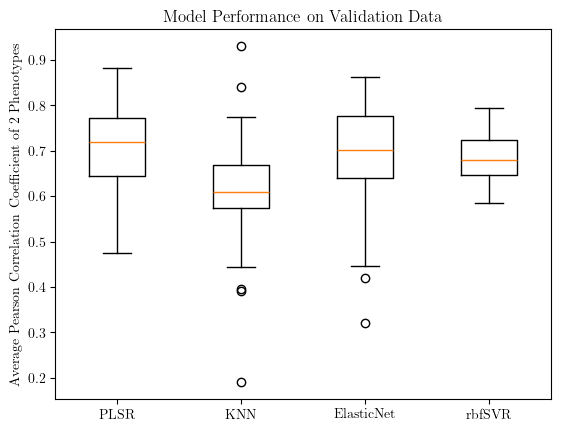

In [32]:
import matplotlib.pyplot as plt
# Use LaTeX for graphs' text
plt.rc('text', usetex=True)
# Use the serif font
plt.rc('font', family='serif')

# Create the boxplot
plt.boxplot(datasets, labels=["PLSR", "KNN", "ElasticNet", "rbfSVR"])

# Add labels and title
plt.ylabel("Average Pearson Correlation Coefficient of 2 Phenotypes")
plt.title("Model Performance on Validation Data")
# plt.show()

#TODO: CHANGE
plt.savefig(f'graphs/model_performance_combined_phenotypes.png', dpi=200)
plt.show()


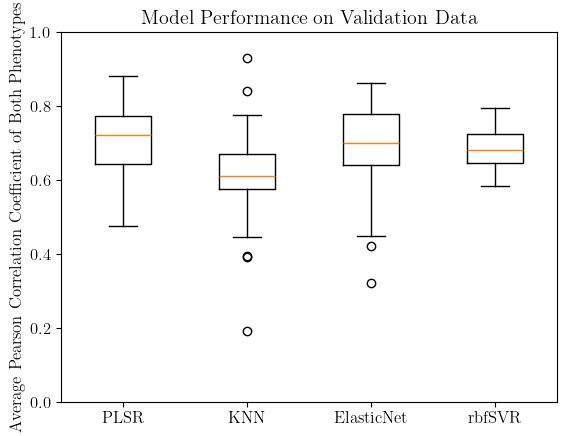

In [29]:
import matplotlib.pyplot as plt

all_data = [PLSR, KNN, ElasticNet, rbfSVR]
desired = []

for foo in all_data:
    desired.append(foo[(foo["Partition"] == "Validation") & (foo["Phenotype"] == "Combined")])
    
datasets = [foo["Pearson_Coefficient"] for foo in desired]

# Use LaTeX for graphs' text
plt.rc('text', usetex=True)
# Use the serif font
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})
plt.ylim(bottom=0, top=1)
# Create the boxplot
plt.boxplot(datasets, labels=["PLSR", "KNN", "ElasticNet", "rbfSVR"])

# Add labels and title
plt.ylabel("Average Pearson Correlation Coefficient of Both Phenotypes")
plt.title("Model Performance on Validation Data")
# plt.show()

#TODO: CHANGE
plt.savefig(f'graphs/model_performance_combined_phenotype.png', dpi=200)
plt.show()


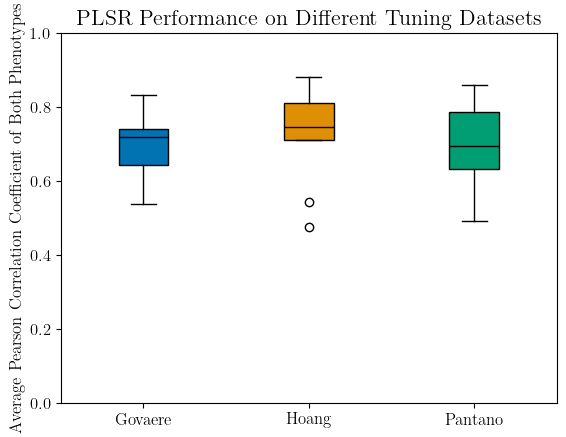

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

desired = []

foo = all_data[0] # select PLSR
datanames = ["Govaere", "Hoang", "Pantano"]

for name in datanames:
    desired.append(foo[(foo["TuningDataset"] == name) & (foo["Phenotype"] == "Combined") & (foo["Partition"] == "Validation")])

datasets = [foo["Pearson_Coefficient"] for foo in desired]

significant_combinations = []

combinations = [(x, y) for x,y in zip([0, 1, 2], [1,2,0])]
for combo in combinations:
    data1 = datasets[combo[0]]
    data2 = datasets[combo[1]]
    
    # calculate significance
    U, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    if p < 0.05:
        significant_combinations.append([combo, p])

# create a set of axes
fig, ax = plt.subplots()
# create a boxplot on the axes
bp = ax.boxplot(datasets, patch_artist=True, labels=["Govaere", "Hoang", "Pantano"])
# graph title TODO: CHANGE
ax.set_title(f"PLSR Performance on Different Tuning Datasets", fontsize=16)
# label y-axis
ax.set_ylabel("Average Pearson Correlation Coefficient of Both Phenotypes") #TODO: CHANGE
ax.set_ylim(bottom=0, top=1)
# Change the colour of the boxes to Seaborn's 'colorblind' palette
colors = sns.color_palette('colorblind')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the color of the median lines
plt.setp(bp['medians'], color='k')

# Use LaTeX for graphs' text
plt.rc('text', usetex=True)
# Use the serif font
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})

# Show the plot
plt.savefig(f'graphs/PLSR_performance_combined_phenotype.png', dpi=200) #TODO: CHANGE
plt.show()

In [16]:
foo = all_data[0]
rows = foo[(foo["TuningDataset"] == "Pantano") & (foo["Phenotype"] == "Combined") & (foo["Partition"] == "Validation")]
rows

,TuningDataset,Fold,Partition,Phenotype,Pearson_Coefficient,NumLV
305,Pantano,Fold1,Validation,Combined,0.492027,9
320,Pantano,Fold2,Validation,Combined,0.661668,9
335,Pantano,Fold3,Validation,Combined,0.858394,9
350,Pantano,Fold4,Validation,Combined,0.735194,9
365,Pantano,Fold5,Validation,Combined,0.666897,9
380,Pantano,Fold6,Validation,Combined,0.621840,9
395,Pantano,Fold7,Validation,Combined,0.542853,9
410,Pantano,Fold8,Validation,Combined,0.845199,9
425,Pantano,Fold9,Validation,Combined,0.803451,9
440,Pantano,Fold10,Validation,Combined,0.720631,9
